In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('teen_phone_addiction_dataset.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 3000 rows, 25 columns


In [ ]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
# Get dataset info
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nColumn names:")
print(list(df.columns))
print(f"\nData types:")
print(df.dtypes)

Dataset Overview:
Shape: (3000, 25)

Column names:
['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

Data types:
ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parent

In [ ]:
# 3A: Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"A. Feature identification:")
print(f"   Numerical features: {len(numerical_cols)}")
print(f"   Categorical features: {len(categorical_cols)}")
print(f"\nNumerical: {numerical_cols}")
print(f"Categorical: {categorical_cols}")

A. Feature identification:
   Numerical features: 20
   Categorical features: 5

Numerical: ['ID', 'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']
Categorical: ['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']


In [ ]:
# 3C: Calculate Mean, Median, and Mode for numerical features
print("C. Mean, Median, Mode, and Midrange for numerical features:")

# Select only numerical columns
numerical_df = df[numerical_cols]

# Calculate mean, median, mode, and midrange for each numerical column
for col in numerical_df.columns:
    mean_val = numerical_df[col].mean()
    median_val = numerical_df[col].median()
    # Mode can return multiple values, handle this case
    mode_val = numerical_df[col].mode()
    midrange_val = (numerical_df[col].max() + numerical_df[col].min()) / 2

    print(f"\n--- {col} ---")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode:")
    if len(mode_val) > 1:
        print(mode_val.to_list())
    else:
        print(mode_val[0])
    print(f"Midrange: {midrange_val:.2f}")

C. Mean, Median, Mode, and Midrange for numerical features:

--- ID ---
Mean: 1500.50
Median: 1500.50
Mode:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,

In [ ]:
# 3B: Missing values analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_pct.values
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

print(f"B. Missing values analysis:")
print(f"   Total missing values: {missing_data.sum()}")
print(f"   Columns with missing data: {len(missing_summary)}")

if len(missing_summary) > 0:
    print(f"\nMissing data details:")
    print(missing_summary)

    # Visualize missing data
    plt.figure(figsize=(10, 6))
    plt.bar(missing_summary['Column'], missing_summary['Missing_Percent'],
            color='red', alpha=0.7)
    plt.xticks(rotation=45)
    plt.title('Missing Data by Column')
    plt.ylabel('Missing %')
    plt.tight_layout()
    plt.show()
else:
    print("   No missing values found!")


B. Missing values analysis:
   Total missing values: 0
   Columns with missing data: 0
   No missing values found!


In [ ]:
# Select features for visualization (focus on phone addiction related)
key_features = [
    'Age', 'Time_on_Social_Media', 'Time_on_Education',
    'Time_on_Gaming', 'Phone_Checks_Per_Day', 'Academic_Performance'
]

# Check which features exist
viz_features = [col for col in key_features if col in df.columns]
if len(viz_features) < 6:
    # Add more numerical features
    extra_features = [col for col in numerical_cols if col not in viz_features][:6-len(viz_features)]
    viz_features.extend(extra_features)

viz_features = viz_features[:6]
print(f"Features for visualization: {viz_features}")


Features for visualization: ['Age', 'Time_on_Social_Media', 'Time_on_Education', 'Time_on_Gaming', 'Phone_Checks_Per_Day', 'Academic_Performance']


BEFORE PREPROCESSING:
A. Histograms (Before):


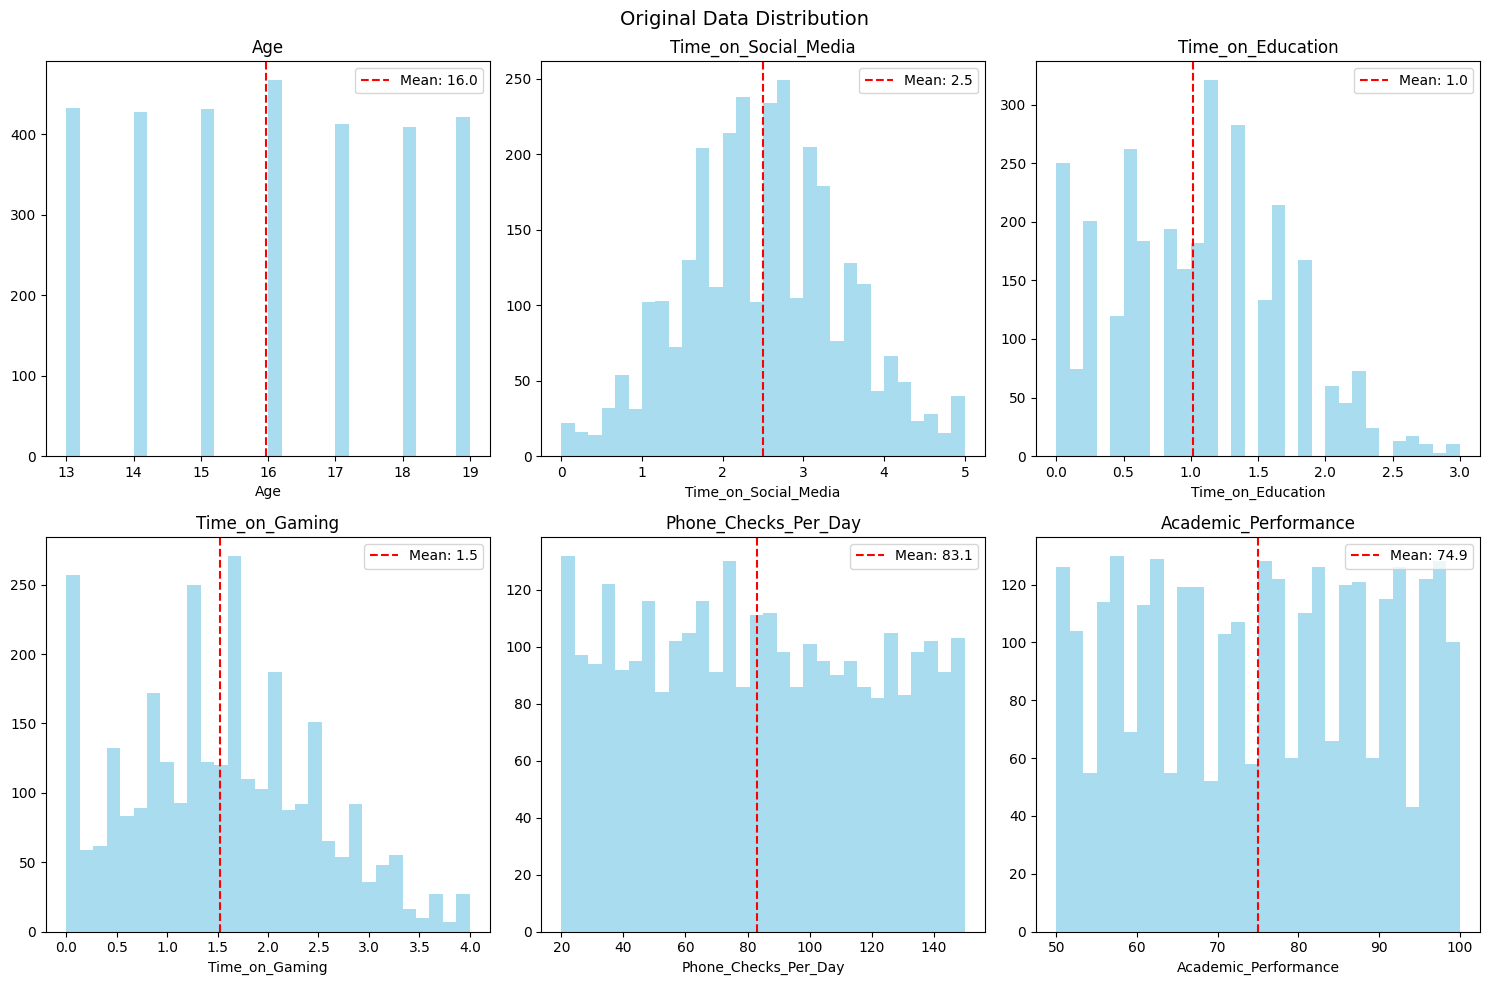


B. Five-Number Summary (Before):

--- Age ---
Min: 13.00
Q1 (25%): 14.00
Median (50%): 16.00
Q3 (75%): 18.00
Max: 19.00

--- Time_on_Social_Media ---
Min: 0.00
Q1 (25%): 1.80
Median (50%): 2.50
Q3 (75%): 3.20
Max: 5.00

--- Time_on_Education ---
Min: 0.00
Q1 (25%): 0.50
Median (50%): 1.00
Q3 (75%): 1.50
Max: 3.00

--- Time_on_Gaming ---
Min: 0.00
Q1 (25%): 0.80
Median (50%): 1.50
Q3 (75%): 2.20
Max: 4.00

--- Phone_Checks_Per_Day ---
Min: 20.00
Q1 (25%): 51.00
Median (50%): 82.00
Q3 (75%): 115.25
Max: 150.00

--- Academic_Performance ---
Min: 50.00
Q1 (25%): 62.00
Median (50%): 75.00
Q3 (75%): 88.00
Max: 100.00
B. Box plots (Before):


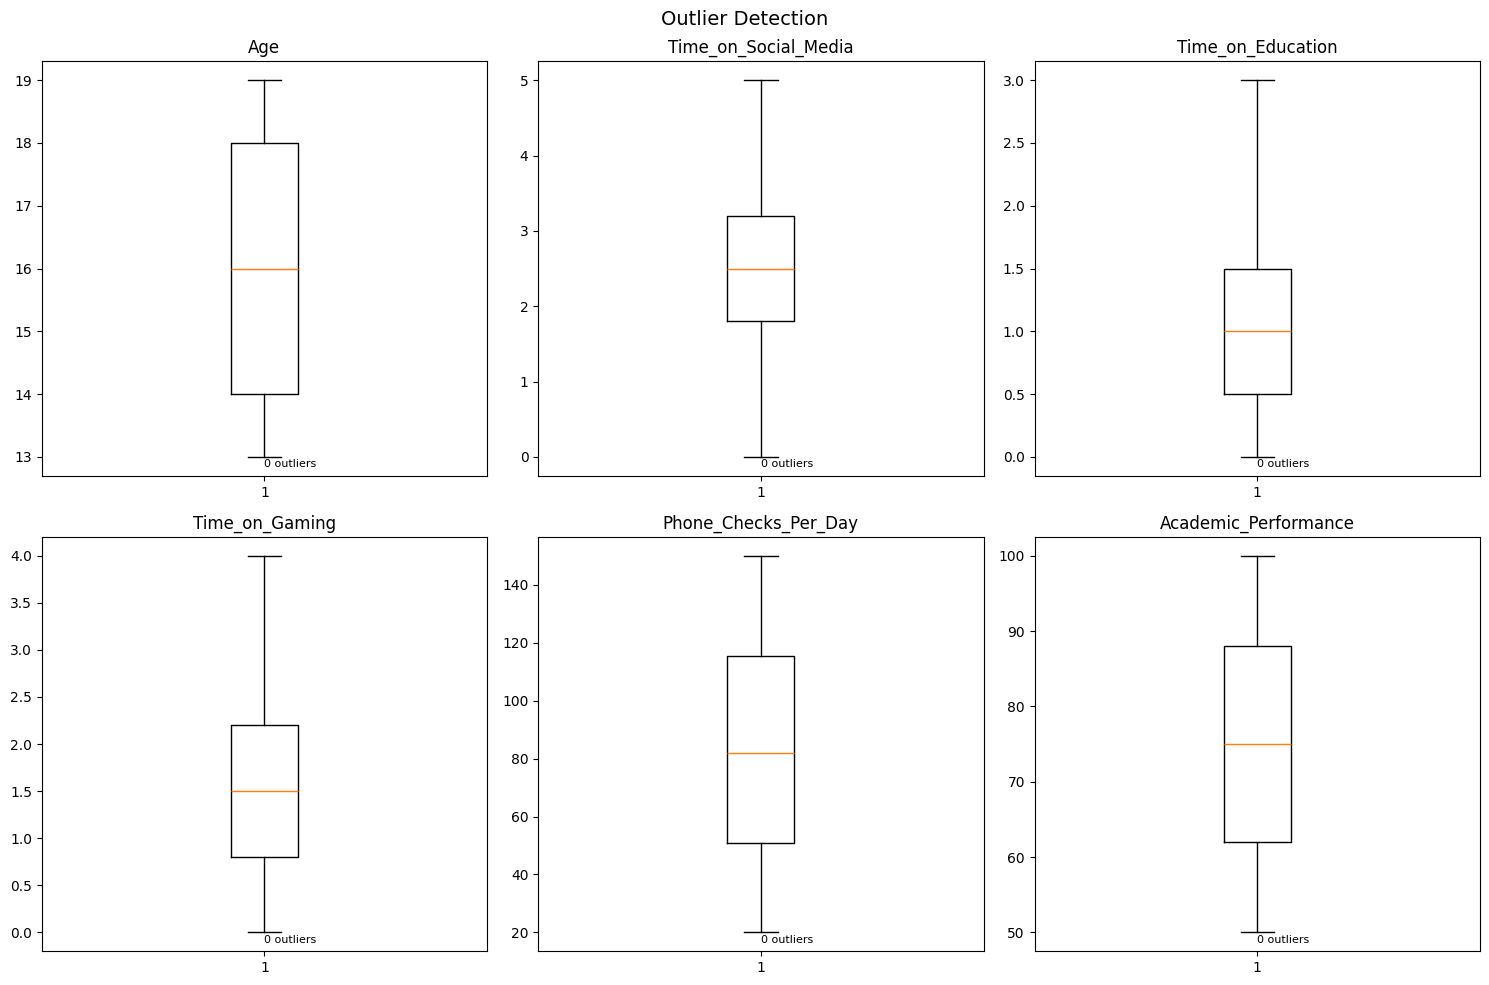

C. Scatter plots (Before):


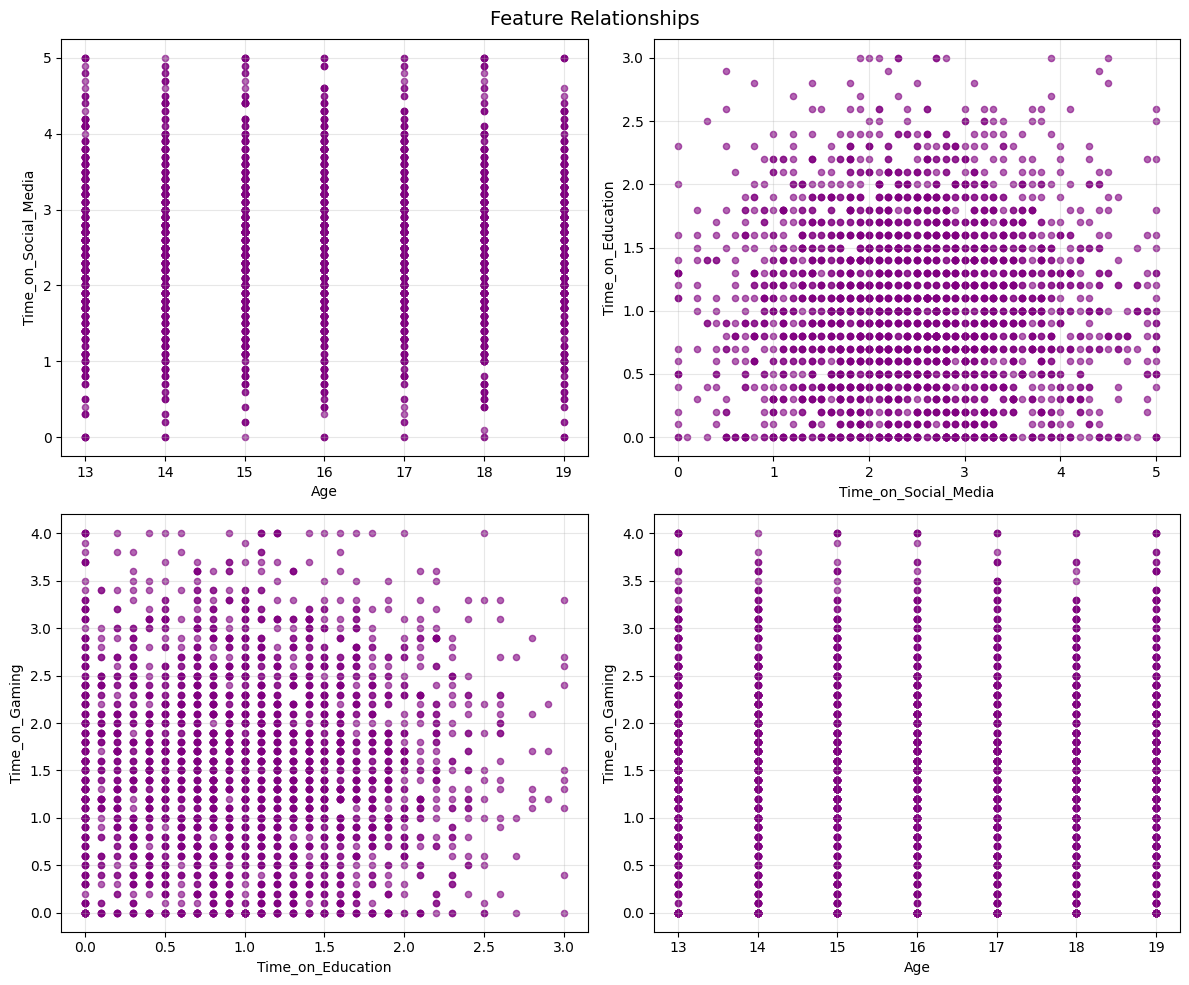

In [ ]:
# BEFORE preprocessing visualizations
print("BEFORE PREPROCESSING:")

# A. Histograms
print("A. Histograms (Before):")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Original Data Distribution', fontsize=14)

for i, feature in enumerate(viz_features):
    row, col = i // 3, i % 3

    axes[row, col].hist(df[feature], bins=30, alpha=0.7, color='skyblue')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)

    # Add mean line
    mean_val = df[feature].mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--',
                          label=f'Mean: {mean_val:.1f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()
print("\nB. Five-Number Summary (Before):")
for feature in viz_features:
    summary = df[feature].describe()
    print(f"\n--- {feature} ---")
    print(f"Min: {summary['min']:.2f}")
    print(f"Q1 (25%): {summary['25%']:.2f}")
    print(f"Median (50%): {summary['50%']:.2f}")
    print(f"Q3 (75%): {summary['75%']:.2f}")
    print(f"Max: {summary['max']:.2f}")
# B. Box plots for outlier detection
print("B. Box plots (Before):")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection', fontsize=14)

for i, feature in enumerate(viz_features):
    row, col = i // 3, i % 3

    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature)

    # Count outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    axes[row, col].text(0.5, 0.02, f'{len(outliers)} outliers',
                       transform=axes[row, col].transAxes, fontsize=8)

plt.tight_layout()
plt.show()

# C. Scatter plots
print("C. Scatter plots (Before):")
if len(viz_features) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Feature Relationships', fontsize=14)

    pairs = [
        (viz_features[0], viz_features[1]),
        (viz_features[1], viz_features[2]),
        (viz_features[2], viz_features[3]),
        (viz_features[0], viz_features[3])
    ]

    for i, (x_feat, y_feat) in enumerate(pairs):
        row, col = i // 2, i % 2

        axes[row, col].scatter(df[x_feat], df[y_feat], alpha=0.6, s=20, color='purple')
        axes[row, col].set_xlabel(x_feat)
        axes[row, col].set_ylabel(y_feat)
        axes[row, col].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [ ]:
df_processed = df.copy()
# 3D: Feature scaling (normalization)
print("D. Feature scaling:")

# Select numerical features for scaling
scale_features = numerical_cols.copy()
print(f"Scaling {len(scale_features)} numerical features")

# Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df_processed.copy()

# Apply scaling to numerical features
df_scaled[scale_features] = scaler.fit_transform(df_processed[scale_features])
print("Applied Min-Max scaling (0-1 range)")

# Verify scaling
print("Scaling verification:")
for col in scale_features[:3]:  # Show first 3
    print(f"   {col}: [{df_scaled[col].min():.3f}, {df_scaled[col].max():.3f}]")


D. Feature scaling:
Scaling 20 numerical features
Applied Min-Max scaling (0-1 range)
Scaling verification:
   ID: [0.000, 1.000]
   Age: [0.000, 1.000]
   Daily_Usage_Hours: [0.000, 1.000]


AFTER PREPROCESSING:
A. Histograms (After):


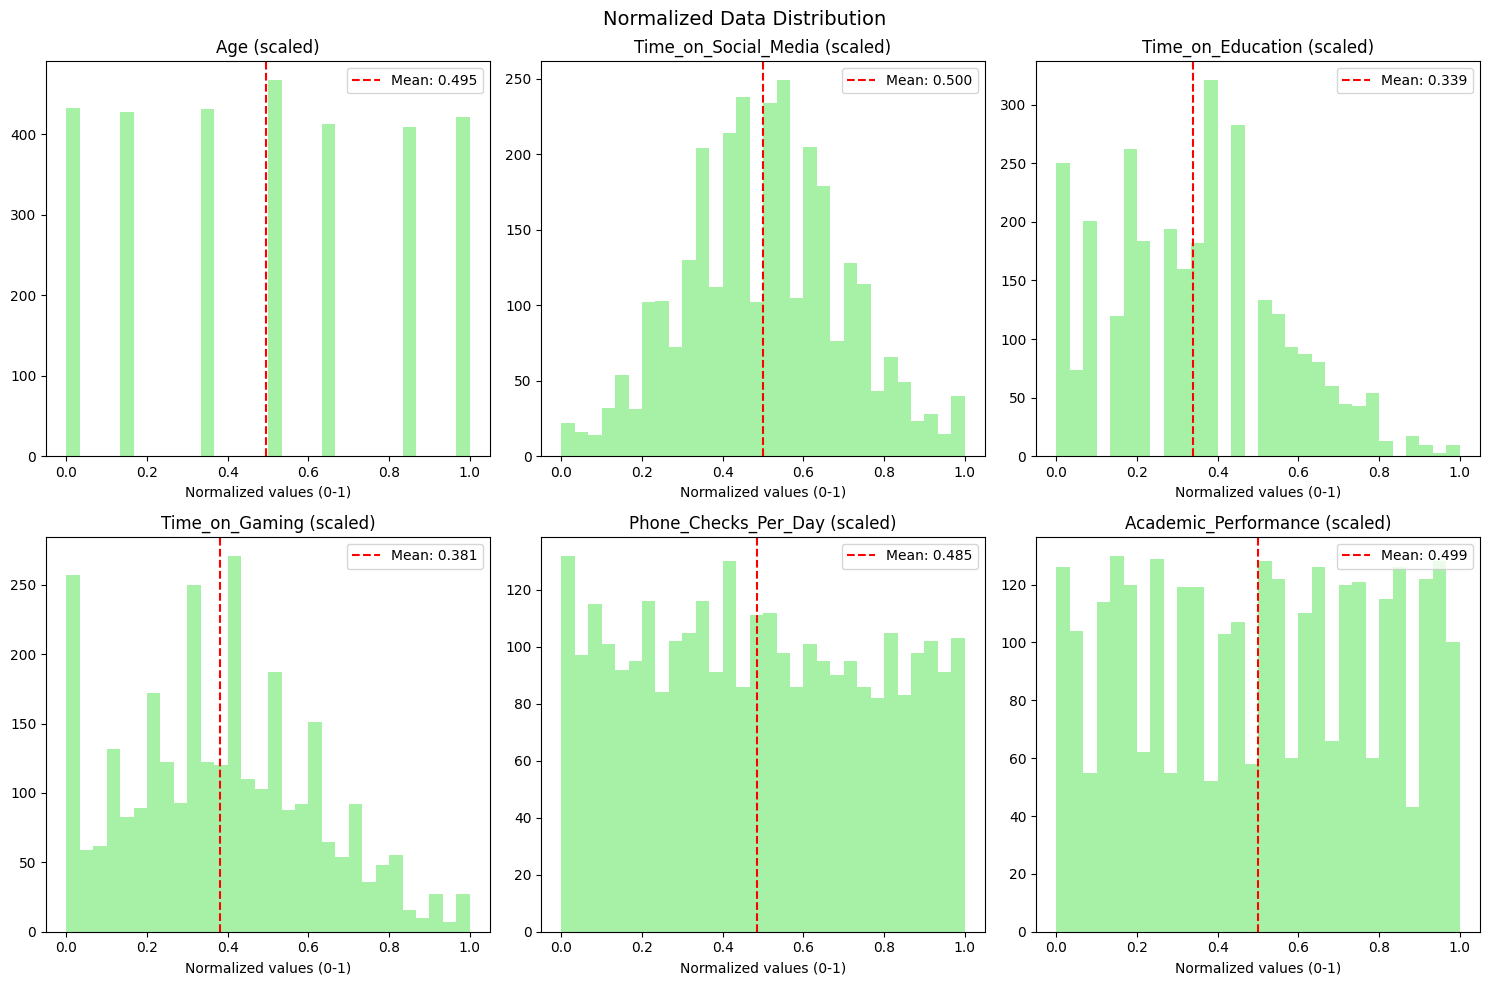

B. Box plots (After):


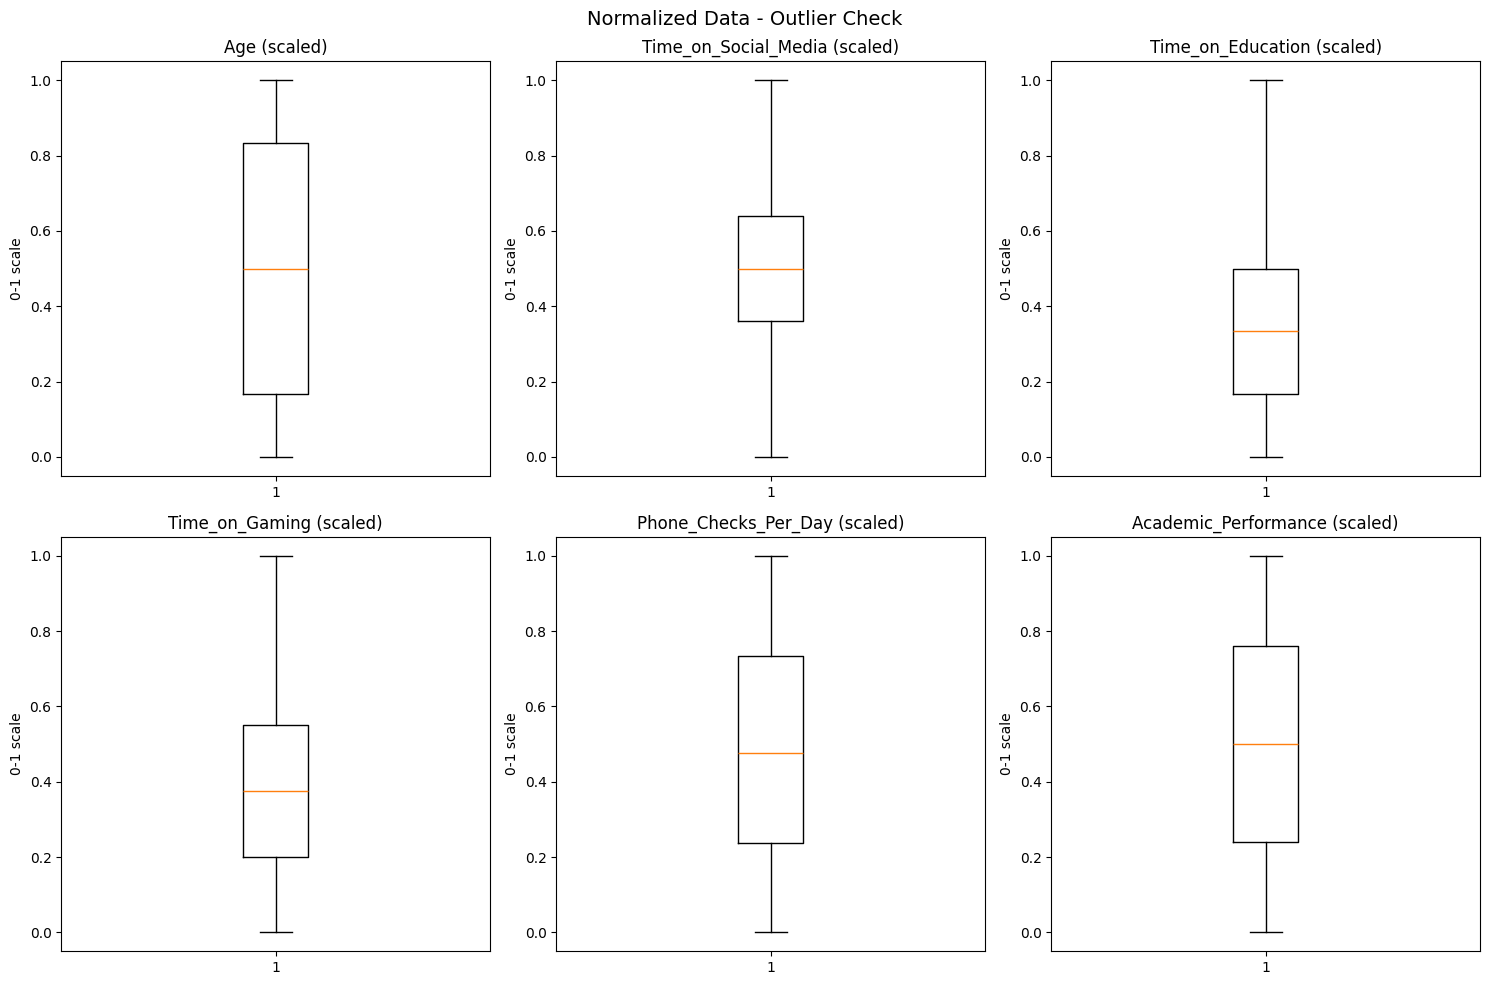

C. Scatter plots (After):


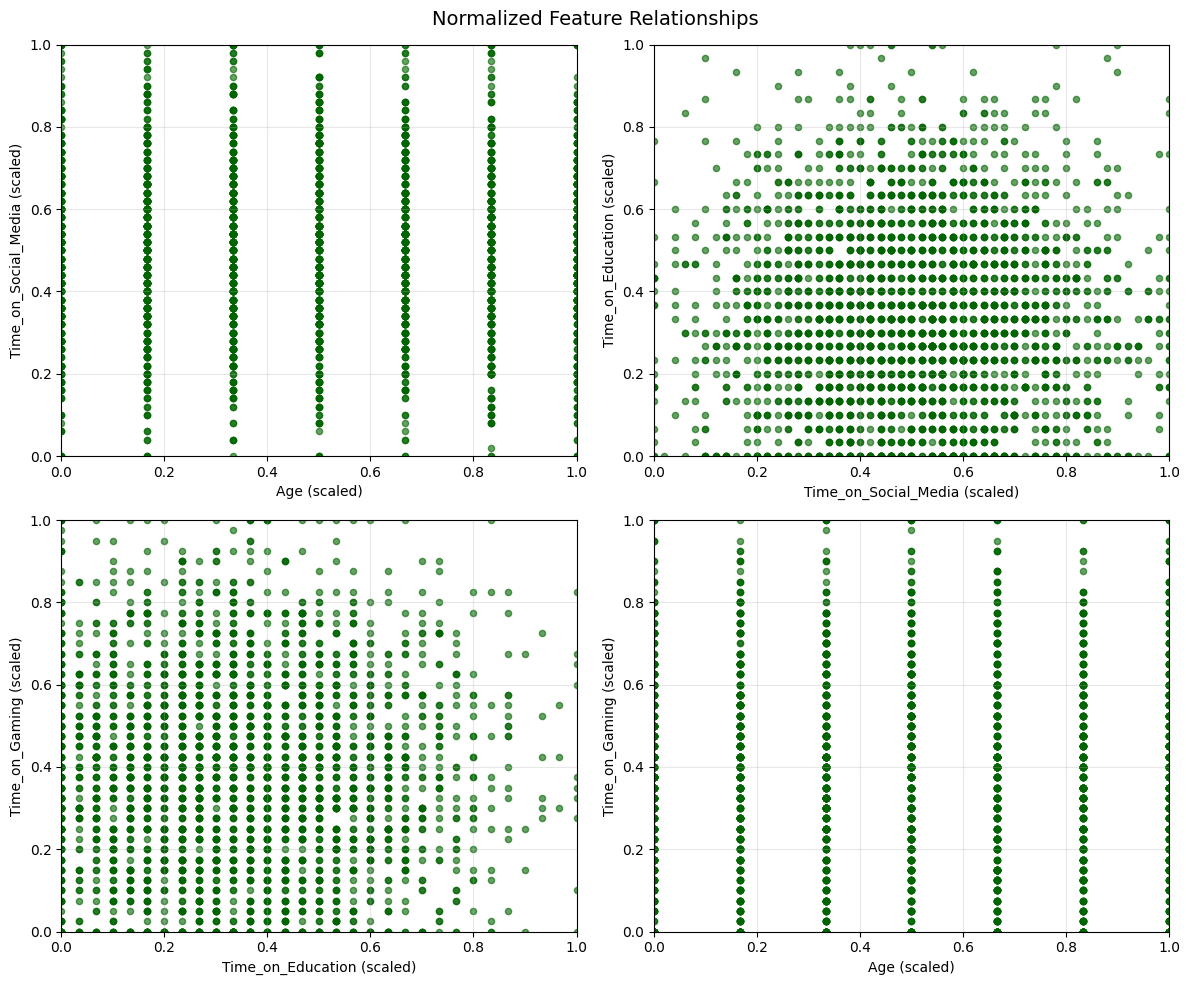

In [ ]:
# AFTER preprocessing visualizations
print("AFTER PREPROCESSING:")

# A. Histograms after scaling
print("A. Histograms (After):")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Normalized Data Distribution', fontsize=14)

for i, feature in enumerate(viz_features):
    row, col = i // 3, i % 3

    axes[row, col].hist(df_scaled[feature], bins=30, alpha=0.8, color='lightgreen')
    axes[row, col].set_title(f'{feature} (scaled)')
    axes[row, col].set_xlabel('Normalized values (0-1)')

    mean_val = df_scaled[feature].mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--',
                          label=f'Mean: {mean_val:.3f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# B. Box plots after scaling
print("B. Box plots (After):")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Normalized Data - Outlier Check', fontsize=14)

for i, feature in enumerate(viz_features):
    row, col = i // 3, i % 3

    axes[row, col].boxplot(df_scaled[feature])
    axes[row, col].set_title(f'{feature} (scaled)')
    axes[row, col].set_ylabel('0-1 scale')

plt.tight_layout()
plt.show()

# C. Scatter plots after scaling
print("C. Scatter plots (After):")
if len(viz_features) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Normalized Feature Relationships', fontsize=14)

    for i, (x_feat, y_feat) in enumerate(pairs):
        row, col = i // 2, i % 2

        axes[row, col].scatter(df_scaled[x_feat], df_scaled[y_feat],
                             alpha=0.6, s=20, color='darkgreen')
        axes[row, col].set_xlabel(f'{x_feat} (scaled)')
        axes[row, col].set_ylabel(f'{y_feat} (scaled)')
        axes[row, col].set_xlim(0, 1)
        axes[row, col].set_ylim(0, 1)
        axes[row, col].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


Before vs After Statistics:
                Feature  Original_Mean  Original_Std  Scaled_Mean  Scaled_Std
0                   Age         15.970         1.989        0.495       0.332
1  Time_on_Social_Media          2.499         0.988        0.500       0.198
2     Time_on_Education          1.016         0.648        0.339       0.216
3        Time_on_Gaming          1.525         0.933        0.381       0.233

Correlation Analysis:


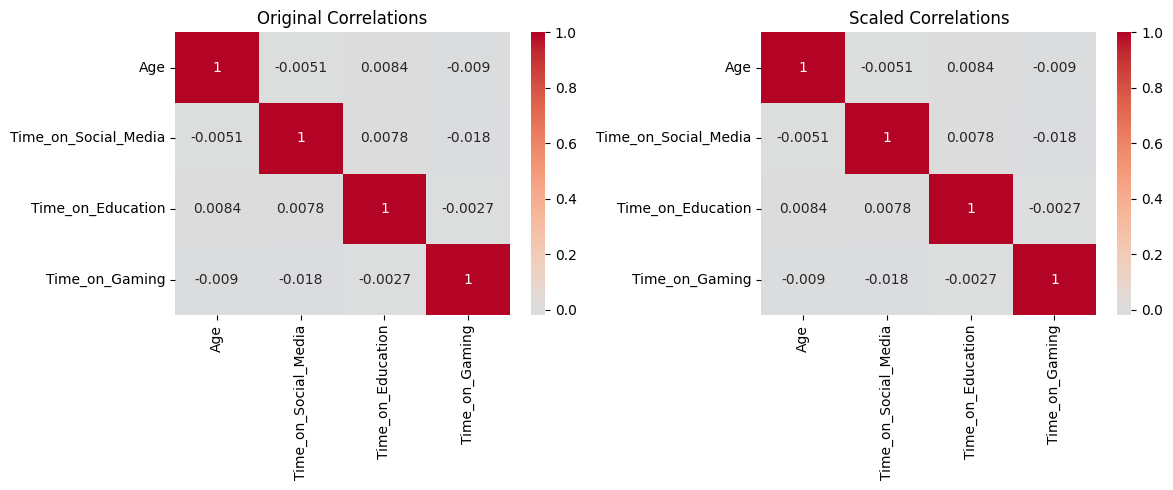


Experiment Summary:
✓ Dataset: 3000 teen participants, 25 features
✓ Focus: Smartphone addiction and behavioral analysis
✓ Features processed: 20 numerical, 5 categorical
✓ Missing values: 0 (handled)
✓ Normalization: Min-Max scaling applied
✓ Ready for addiction prediction models


In [ ]:
# Comparison analysis
comparison_features = viz_features[:4]

stats_comparison = pd.DataFrame({
    'Feature': comparison_features,
    'Original_Mean': [df[col].mean() for col in comparison_features],
    'Original_Std': [df[col].std() for col in comparison_features],
    'Scaled_Mean': [df_scaled[col].mean() for col in comparison_features],
    'Scaled_Std': [df_scaled[col].std() for col in comparison_features]
})

print("Before vs After Statistics:")
print(stats_comparison.round(3))

# Correlation analysis
print("\nCorrelation Analysis:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original correlations
original_corr = df[comparison_features].corr()
sns.heatmap(original_corr, annot=True, cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Original Correlations')

# Scaled correlations
scaled_corr = df_scaled[comparison_features].corr()
sns.heatmap(scaled_corr, annot=True, cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('Scaled Correlations')

plt.tight_layout()
plt.show()

print("\nExperiment Summary:")
print(f"✓ Dataset: {df.shape[0]} teen participants, {df.shape[1]} features")
print(f"✓ Focus: Smartphone addiction and behavioral analysis")
print(f"✓ Features processed: {len(numerical_cols)} numerical, {len(categorical_cols)} categorical")
print(f"✓ Missing values: {missing_data.sum()} (handled)")
print(f"✓ Normalization: Min-Max scaling applied")
print("✓ Ready for addiction prediction models")
